In [8]:
import pandas as pd # standard
import numpy as np # standard
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # for accuracy calculation
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
prev = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")
substages = pd.read_excel("patient_substage.xlsx")
stage_df = pd.merge(prev, substages, left_on = "pub_id", right_on = "pub_id")

In [3]:
lower_column_index = stage_df.columns.get_loc("T51")
upper_column_index = stage_df.columns.get_loc("T83.1")
label_column_index = stage_df.columns.get_loc("Diagnosis")
cancer_column_index = stage_df.columns.get_loc("Current Clinical Stage")

column_indices = np.arange(lower_column_index, upper_column_index)
column_indices = np.append(column_indices, label_column_index)
column_indices = np.append(column_indices, cancer_column_index)


stage_df = stage_df.iloc[:, column_indices]

# keep only Control and Adenocarcinoma for analysis
stage_df = stage_df.reset_index(drop=True)

In [5]:
stage_df["cancer stage"] = stage_df["Diagnosis"] +"_" + stage_df["Current Clinical Stage"]
stage_df_long = pd.melt(stage_df, id_vars=['Current Clinical Stage', 'Diagnosis', 'cancer stage'], var_name = "temp", value_name="dsp")
stage_df_long["temp"] = stage_df_long["temp"].str.replace("T", "")
stage_df_long["temp"] = stage_df_long["temp"].astype(float)


In [6]:
cancer = "AC"

graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer]
median_df = thermogram_utilities.median_curve(graph_df, "cancer stage", "temp", "dsp")


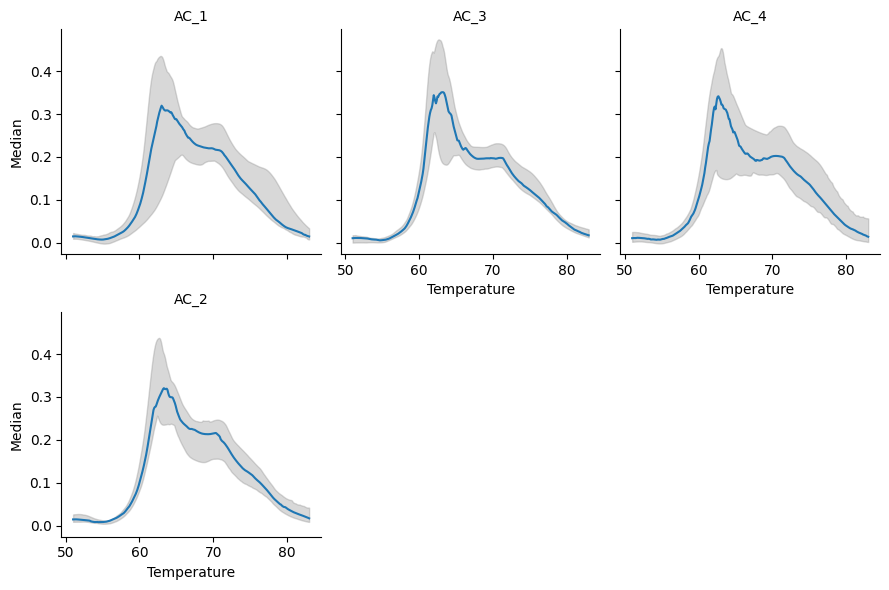

In [9]:
# courtesy of chatGPT
g = sns.FacetGrid(median_df, col="type", col_wrap= 3, palette = 'colorblind')


g.set_axis_labels("Temperature", "Median")
g.set_titles(col_template="{col_name}")

# Define a custom function to add the ribbon to each panel
def add_ribbon(**kwargs):
    ax = plt.gca()
    panel_data = kwargs.pop("data")  # Get the data specific to the current panel
    
    sns.lineplot(data=panel_data, x='temperature', y='median', ax=ax, palette='colorblind')
    ax.fill_between(panel_data['temperature'], panel_data['lower_q'], panel_data['upper_q'], alpha=0.3, color='gray')

# Use FacetGrid.map_dataframe to apply the custom function to each panel
g.map_dataframe(add_ribbon)

# Show the plot
plt.show()



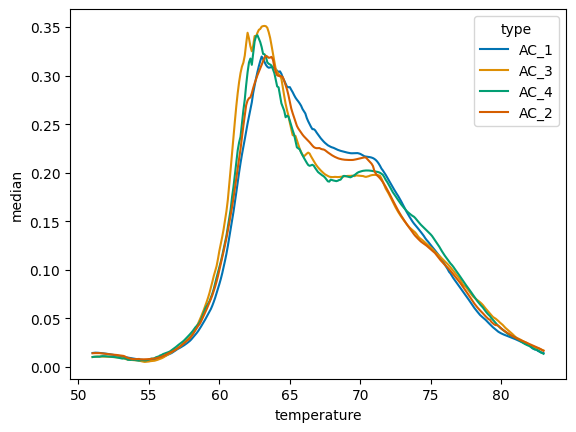

In [15]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')


In [18]:
AC_results = pd.read_excel("AC_Stage.xlsx")

AC_results['max_depth'] = np.where(pd.isna(AC_results['max_depth']), "None", AC_results["max_depth"])
AC_results['max_features'] = np.where(pd.isna(AC_results['max_features']), "None", AC_results["max_features"])
results = AC_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
results.head(3)

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
19,1000,35.0,log2,0.367951,0.624821
16,500,None,log2,0.367152,0.624698
10,250,None,log2,0.366990,0.622991


In [24]:
cancer = "SCC"

graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer]
median_df = thermogram_utilities.median_curve(graph_df, "cancer stage", "temp", "dsp")


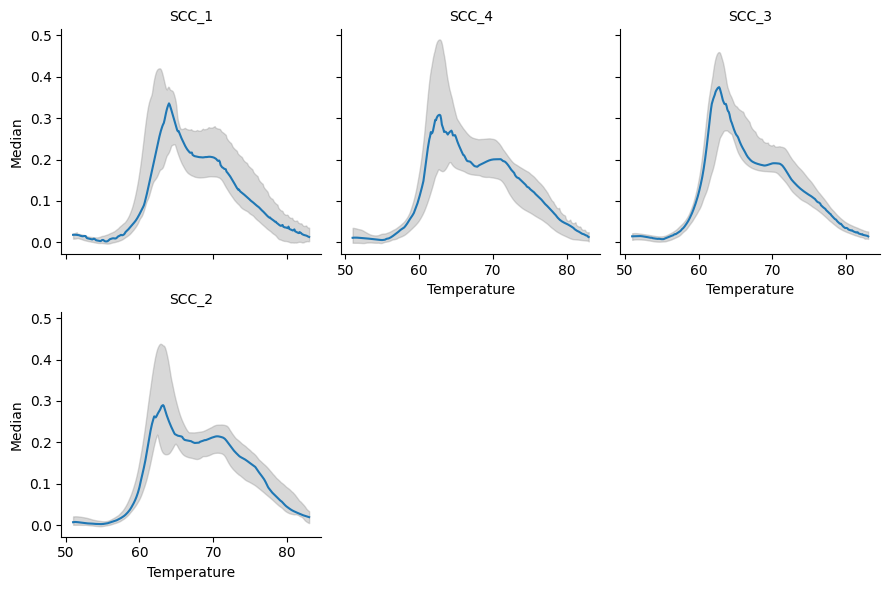

In [25]:
g = sns.FacetGrid(median_df, col="type", col_wrap= 3, palette = 'colorblind')


g.set_axis_labels("Temperature", "Median")
g.set_titles(col_template="{col_name}")

# Define a custom function to add the ribbon to each panel
def add_ribbon(**kwargs):
    ax = plt.gca()
    panel_data = kwargs.pop("data")  # Get the data specific to the current panel
    
    sns.lineplot(data=panel_data, x='temperature', y='median', ax=ax, palette='colorblind')
    ax.fill_between(panel_data['temperature'], panel_data['lower_q'], panel_data['upper_q'], alpha=0.3, color='gray')

# Use FacetGrid.map_dataframe to apply the custom function to each panel
g.map_dataframe(add_ribbon)

# Show the plot
plt.show()


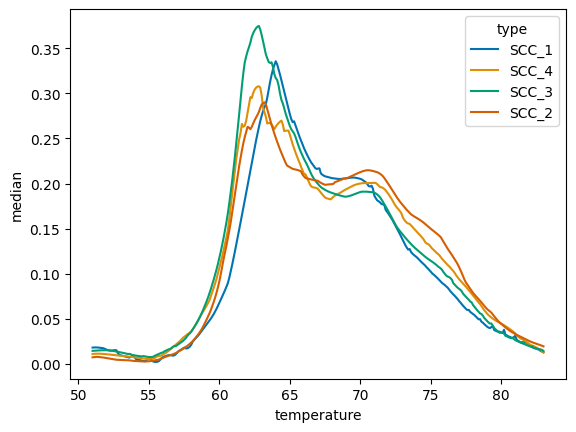

In [26]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')

In [21]:
SCC_results = pd.read_excel("SCC_Stage.xlsx")

SCC_results['max_depth'] = np.where(pd.isna(SCC_results['max_depth']), "None", SCC_results["max_depth"])
SCC_results['max_features'] = np.where(pd.isna(SCC_results['max_features']), "None", SCC_results["max_features"])
results = SCC_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
results.head(3)

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
13,500,23.0,log2,0.329758,0.605949
16,500,None,log2,0.329579,0.606274
19,1000,23.0,log2,0.329173,0.605778


In [41]:
cancer = "Control"

graph_df = stage_df_long[(stage_df_long["Diagnosis"] != cancer) & (stage_df_long["Diagnosis"] != "SCLC") ]
median_df = thermogram_utilities.median_curve(graph_df, "Current Clinical Stage", "temp", "dsp")


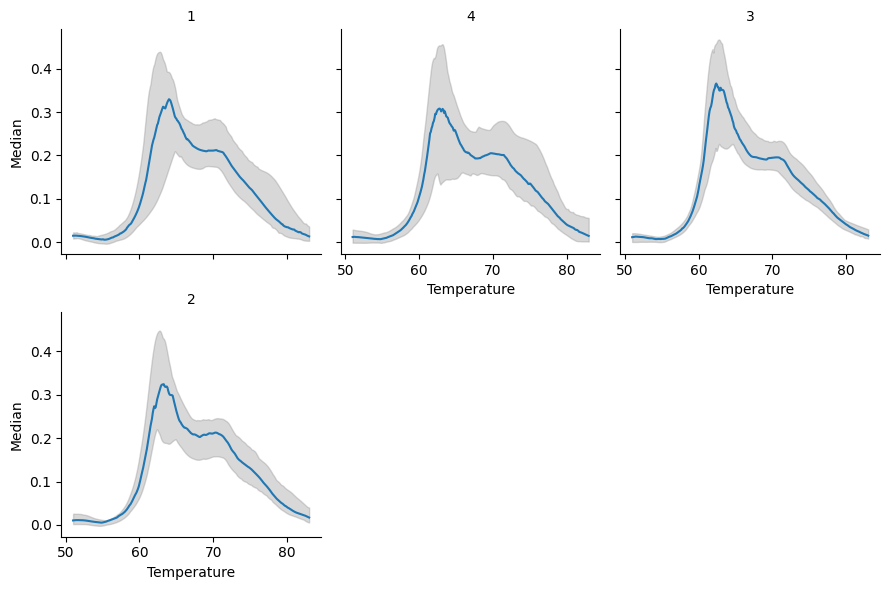

In [42]:
g = sns.FacetGrid(median_df, col="type", col_wrap= 3, palette = 'colorblind')


g.set_axis_labels("Temperature", "Median")
g.set_titles(col_template="{col_name}")

# Define a custom function to add the ribbon to each panel
def add_ribbon(**kwargs):
    ax = plt.gca()
    panel_data = kwargs.pop("data")  # Get the data specific to the current panel
    
    sns.lineplot(data=panel_data, x='temperature', y='median', ax=ax, palette='colorblind')
    ax.fill_between(panel_data['temperature'], panel_data['lower_q'], panel_data['upper_q'], alpha=0.3, color='gray')

# Use FacetGrid.map_dataframe to apply the custom function to each panel
g.map_dataframe(add_ribbon)

# Show the plot
plt.show()

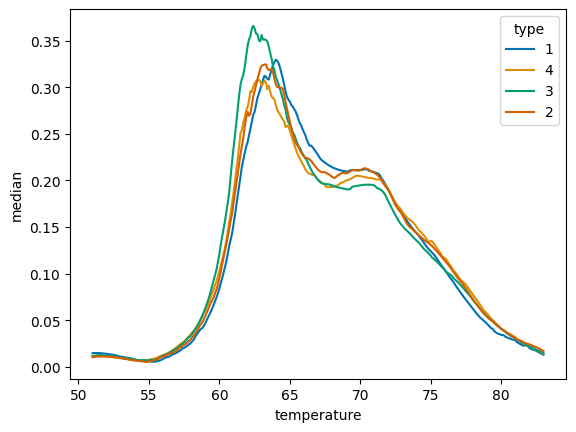

In [43]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')

In [33]:
all_results = pd.read_excel("All_Stage.xlsx")

all_results['max_depth'] = np.where(pd.isna(all_results['max_depth']), "None", all_results["max_depth"])
all_results['max_features'] = np.where(pd.isna(all_results['max_features']), "None", all_results["max_features"])
results = all_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
results.head(3)

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
5,100,None,sqrt,0.339149,0.622328
8,250,66.0,sqrt,0.338944,0.624373
7,250,66.0,log2,0.338697,0.624906


In [ ]:
test_df = median_df[median_df['type'] == 'Control']
p = sns.lineplot(data=test_df, x='temperature', y='median', palette='colorblind')
plt.fill_between(test_df['temperature'], test_df['lower_q'], test_df['upper_q'], alpha = 0.3)